<a href="https://colab.research.google.com/github/aliyaaliyal/mesin-learning/blob/main/Klasifikasi_Teks_Data_Tidak_Terstruktur_Menggunakan_Recurrant_Neural_Network_Berdasarkan_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import library sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split # Split Data 
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score #metrik performa 

# import pandas dan numpy
import pandas as pd
import numpy as np

# import library manipulasi string
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization 
import warnings   
warnings.filterwarnings('ignore')
%matplotlib inline

#import library tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.roblox.client',
    lang='en',
    country='us',
    sort=Sort.MOST_RELEVANT,
    count=5000, # defaults to 100
    filter_score_with=None
)

In [ ]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))

In [ ]:
df=data[['content']]

Memanggil Dataset

In [ ]:
pd.options.display.max_colwidth

50

In [ ]:
pd.options.display.max_colwidth=200

In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
df.head()

,content
0,"I like all the games. But some don't show up, even if you search for them. And it drains my battery faster than any other app I've downloaded. Chat filter needs to be toggleable, or customizeable. It sometimes forces me to leave a server because of a number of bugs that can occur which make it unplayable, such as shoving the screen halfway up the screen so I can't see anything."
1,"I have put 5 stars because I love the wide variety of games from horror to just plain fun! I was thinking about putting 4 only because for the past few months, every game I go into, I can play on it for just a few minutes until my chromebook-keep that in mind-or the Roblox app itself glitches. It glitches in a way that my game freezes and I'm unable to move. When I try to move, there is a blue box around one of the icons on screen. I don't know how to fix it, but I love the game overall!"
2,"This game is so fun!! I love all the kind people on it and creative avatars people make! I do want to talk about some bugs and problems though. Sometimes the screen does this thing where you can't move it, and you have to leave and rejoin to make it stop. And then the screen also does this weird bug where whenever you walk it makes the screen move too. And sometimes it zooms in and out when you try to move it. There are online daters but I don't see many of them. Overall, it's a great game. :)"
3,"So fun, lots of games to choose from. Also I love that you can customize your avatar, create items, and find friends! The only thing i don't like about this game is that me and my other fellow mobile players are experiencing a bug that causes our screen to get stuck, or unable to look up, down, left, or right, you're only able to zoom in and out when this accurs. It stops when I leave and rejoin, but it's a huge issue and really annoying when I'm in the middle of something! Please fix this :)"
4,"This game i have to admit, is really fun. The only thing that bothers me is, i have been experiencing lots of bugs, and sometimes it won't let me play a game at all. Sometimes, the screen freezes, sometimes my zoom in totally breaks so that i have to leave Roblox itself, sometimes it just totally kicks me out of the game for no obvious reason. But overall its a great game!"


**Membuat Fungsi untuk Text Pre-Processing**

In [ ]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This function cleans the input text by
    - menghapus links
    - menghapus special chars
    - menghapus numbers
    - menghapus stopwords
    - transforming in lower case
    - menghapus excessive whitespaces
    Arguments:
        text (str): text to clean
        remove_stopwords (bool): remove stopwords or not
    Returns:
        str: cleaned text
    """
    # menghapus link
    text = re.sub(r"http\S+", "", text)
    # menghapus angka dan karakter spesial
    text = re.sub("[^A-Za-z]+", " ", text)
    # menghapus stopwords
    if remove_stopwords:
        # 1. membuat tokens
        tokens = nltk.word_tokenize(text)
        # 2. memeriksa jika sebuah token adalah stopword dan menghapusnya
        stopwords = nltk.corpus.stopwords.words("english")
        # memperluas stopword
        #my_stopwords = ['friends','would', 'even', 'great', 'one', 'also', 'sometimes', 'app', 'playing', 'like', 'game', 'games', 'roblox','play', 'good', 'problem', 'fix', 'screen', 'fun', 'please', 'really', 'love','get']
        #stopwords.extend(my_stopwords)
        tokens = [w for w in tokens if not w.lower() in stopwords]
        # 3. menggabungkan semua token
        text = " ".join(tokens)
    # mengembalikan teks yang sudah bersih
    text = text.lower().strip()
    return text

Lambda untuk memanggil fungsi Pre-Processing, Menerapkan pada kolom review di data frame df & Menyimpan pada data frame df kolom cleaned

In [ ]:
df['cleaned'] = df['content'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [ ]:
df.head(3)

,content,cleaned
0,"I like all the games. But some don't show up, even if you search for them. And it drains my battery faster than any other app I've downloaded. Chat filter needs to be toggleable, or customizeable. It sometimes forces me to leave a server because of a number of bugs that can occur which make it unplayable, such as shoving the screen halfway up the screen so I can't see anything.",like games show even search drains battery faster app downloaded chat filter needs toggleable customizeable sometimes forces leave server number bugs occur make unplayable shoving screen halfway screen see anything
1,"I have put 5 stars because I love the wide variety of games from horror to just plain fun! I was thinking about putting 4 only because for the past few months, every game I go into, I can play on it for just a few minutes until my chromebook-keep that in mind-or the Roblox app itself glitches. It glitches in a way that my game freezes and I'm unable to move. When I try to move, there is a blue box around one of the icons on screen. I don't know how to fix it, but I love the game overall!",put stars love wide variety games horror plain fun thinking putting past months every game go play minutes chromebook keep mind roblox app glitches glitches way game freezes unable move try move blue box around one icons screen know fix love game overall
2,"This game is so fun!! I love all the kind people on it and creative avatars people make! I do want to talk about some bugs and problems though. Sometimes the screen does this thing where you can't move it, and you have to leave and rejoin to make it stop. And then the screen also does this weird bug where whenever you walk it makes the screen move too. And sometimes it zooms in and out when you try to move it. There are online daters but I don't see many of them. Overall, it's a great game. :)",game fun love kind people creative avatars people make want talk bugs problems though sometimes screen thing move leave rejoin make stop screen also weird bug whenever walk makes screen move sometimes zooms try move online daters see many overall great game


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['text_lemmatized'] = df.cleaned.apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df.head(3)

,content,cleaned,text_lemmatized
0,"I like all the games. But some don't show up, even if you search for them. And it drains my battery faster than any other app I've downloaded. Chat filter needs to be toggleable, or customizeable. It sometimes forces me to leave a server because of a number of bugs that can occur which make it unplayable, such as shoving the screen halfway up the screen so I can't see anything.",like games show even search drains battery faster app downloaded chat filter needs toggleable customizeable sometimes forces leave server number bugs occur make unplayable shoving screen halfway screen see anything,"[like, game, show, even, search, drain, battery, faster, app, downloaded, chat, filter, need, toggleable, customizeable, sometimes, force, leave, server, number, bug, occur, make, unplayable, shoving, screen, halfway, screen, see, anything]"
1,"I have put 5 stars because I love the wide variety of games from horror to just plain fun! I was thinking about putting 4 only because for the past few months, every game I go into, I can play on it for just a few minutes until my chromebook-keep that in mind-or the Roblox app itself glitches. It glitches in a way that my game freezes and I'm unable to move. When I try to move, there is a blue box around one of the icons on screen. I don't know how to fix it, but I love the game overall!",put stars love wide variety games horror plain fun thinking putting past months every game go play minutes chromebook keep mind roblox app glitches glitches way game freezes unable move try move blue box around one icons screen know fix love game overall,"[put, star, love, wide, variety, game, horror, plain, fun, thinking, putting, past, month, every, game, go, play, minute, chromebook, keep, mind, roblox, app, glitch, glitch, way, game, freeze, unable, move, try, move, blue, box, around, one, icon, screen, know, fix, love, game, overall]"
2,"This game is so fun!! I love all the kind people on it and creative avatars people make! I do want to talk about some bugs and problems though. Sometimes the screen does this thing where you can't move it, and you have to leave and rejoin to make it stop. And then the screen also does this weird bug where whenever you walk it makes the screen move too. And sometimes it zooms in and out when you try to move it. There are online daters but I don't see many of them. Overall, it's a great game. :)",game fun love kind people creative avatars people make want talk bugs problems though sometimes screen thing move leave rejoin make stop screen also weird bug whenever walk makes screen move sometimes zooms try move online daters see many overall great game,"[game, fun, love, kind, people, creative, avatar, people, make, want, talk, bug, problem, though, sometimes, screen, thing, move, leave, rejoin, make, stop, screen, also, weird, bug, whenever, walk, make, screen, move, sometimes, zoom, try, move, online, daters, see, many, overall, great, game]"


In [ ]:
df['text_string'] = df['text_lemmatized'].apply(lambda x: ' '.join([item for item in x]))

In [ ]:
df.head()

,content,cleaned,text_lemmatized,text_string
0,"I like all the games. But some don't show up, even if you search for them. And it drains my battery faster than any other app I've downloaded. Chat filter needs to be toggleable, or customizeable. It sometimes forces me to leave a server because of a number of bugs that can occur which make it unplayable, such as shoving the screen halfway up the screen so I can't see anything.",like games show even search drains battery faster app downloaded chat filter needs toggleable customizeable sometimes forces leave server number bugs occur make unplayable shoving screen halfway screen see anything,"[like, game, show, even, search, drain, battery, faster, app, downloaded, chat, filter, need, toggleable, customizeable, sometimes, force, leave, server, number, bug, occur, make, unplayable, shoving, screen, halfway, screen, see, anything]",like game show even search drain battery faster app downloaded chat filter need toggleable customizeable sometimes force leave server number bug occur make unplayable shoving screen halfway screen see anything
1,"I have put 5 stars because I love the wide variety of games from horror to just plain fun! I was thinking about putting 4 only because for the past few months, every game I go into, I can play on it for just a few minutes until my chromebook-keep that in mind-or the Roblox app itself glitches. It glitches in a way that my game freezes and I'm unable to move. When I try to move, there is a blue box around one of the icons on screen. I don't know how to fix it, but I love the game overall!",put stars love wide variety games horror plain fun thinking putting past months every game go play minutes chromebook keep mind roblox app glitches glitches way game freezes unable move try move blue box around one icons screen know fix love game overall,"[put, star, love, wide, variety, game, horror, plain, fun, thinking, putting, past, month, every, game, go, play, minute, chromebook, keep, mind, roblox, app, glitch, glitch, way, game, freeze, unable, move, try, move, blue, box, around, one, icon, screen, know, fix, love, game, overall]",put star love wide variety game horror plain fun thinking putting past month every game go play minute chromebook keep mind roblox app glitch glitch way game freeze unable move try move blue box around one icon screen know fix love game overall
2,"This game is so fun!! I love all the kind people on it and creative avatars people make! I do want to talk about some bugs and problems though. Sometimes the screen does this thing where you can't move it, and you have to leave and rejoin to make it stop. And then the screen also does this weird bug where whenever you walk it makes the screen move too. And sometimes it zooms in and out when you try to move it. There are online daters but I don't see many of them. Overall, it's a great game. :)",game fun love kind people creative avatars people make want talk bugs problems though sometimes screen thing move leave rejoin make stop screen also weird bug whenever walk makes screen move sometimes zooms try move online daters see many overall great game,"[game, fun, love, kind, people, creative, avatar, people, make, want, talk, bug, problem, though, sometimes, screen, thing, move, leave, rejoin, make, stop, screen, also, weird, bug, whenever, walk, make, screen, move, sometimes, zoom, try, move, online, daters, see, many, overall, great, game]",game fun love kind people creative avatar people make want talk bug problem though sometimes screen thing move leave rejoin make stop screen also weird bug whenever walk make screen move sometimes zoom try move online daters see many overall great game
3,"So fun, lots of games to choose from. Also I love that you can customize your avatar, create items, and find friends! The only thing i don't like about this game is that me and my other fellow mobile players are experiencing a bug that causes our screen to get stuck, or unable to look up, down, lef

## **Awal Clustering**

Langkah awal adalah:
Melakukan vectorizer TF-IDF pada kolom cleaned dan Menyimpannya di dalam variabel X

In [ ]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['text_string'])

In [ ]:
X

<5000x1933 sparse matrix of type '<class 'numpy.float64'>'
	with 128764 stored elements in Compressed Sparse Row format>

**Plotting Elbow Method untuk mengetahui jumlah cluster yang optimal dari gambar plot dibawah diketahui jumlah cluster optimal adalah 3**

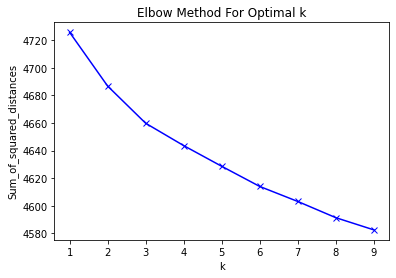

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Menerapkan metode K-Means untuk membuat cluster dengan jumlah clusternya adalah 3**

In [ ]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Menambahkan kolom cluster, x0, x1 pada data frame df

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [ ]:
df

,content,score,cleaned,text_lemmatized,text_string,cluster,x0,x1
0,This game is so fun!! I love all the kind peop...,4,game fun love kind people creative avatars peo...,"[game, fun, love, kind, people, creative, avat...",game fun love kind people creative avatar peop...,0,0.099089,0.354134
1,"So fun, lots of games to choose from. Also I l...",4,fun lots games choose also love customize avat...,"[fun, lot, game, choose, also, love, customize...",fun lot game choose also love customize avatar...,0,0.063453,0.204462
2,"This game i have to admit, is really fun. The ...",4,game admit really fun thing bothers experienci...,"[game, admit, really, fun, thing, bother, expe...",game admit really fun thing bother experiencin...,0,0.068240,0.195842
3,"Honestly It's a great game, except for some bu...",4,honestly great game except bugs happen tablets...,"[honestly, great, game, except, bug, happen, t...",honestly great game except bug happen tablet p...,0,0.142591,0.157555
4,"Very fun experience, unless you are using a ch...",3,fun experience unless using chromebook like mi...,"[fun, experience, unless, using, chromebook, l...",fun experience unless using chromebook like mi...,1,0.097259,-0.028751
...,...,...,...,...,...,...,...,...
4995,roblox is a great game overall there are thous...,5,roblox great game overall thousands games choo...,"[roblox, great, game, overall, thousand, game,...",roblox great game overall thousand game choose...,0,0.029944,0.092633
4996,I really like the game but i do think it could...,4,really like game think could better suppose pl...,"[really, like, game, think, could, better, sup...",really like game think could better suppose pl...,2,-0.080866,0.004437
4997,Roblox is a really good game! I really enjoy i...,5,roblox really good game really enjoy things bu...,"[roblox, really, good, game, really, enjoy, th...",roblox really good game really enjoy thing bug...,0,0.141279,0.184165
4998,"Lots of fun, you can dress up, there's a lot o...",4,lots fun dress lot games choose example tycoon...,"[lot, fun, dress, lot, game, choose, example, ...",lot fun dress lot game choose example tycoon o...,0,-0.031256,0.176241


Menampilkan 10 kata yang paling sering muncul pada masing-masing cluster

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
mobile,glitch,zoom,sometimes,fix,camera,bug,move,game,screen

Cluster 1
good,love,make,roblox,really,like,friend,fun,play,game

Cluster 2
screen,time,app,phone,problem,play,roblox,please,fix,game


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(" ".join(df['text_string']))
fd = FreqDist(words)

In [ ]:
fd.tabulate(10)

  game   play roblox   like    fix really    fun   good    get screen 
 11896   3376   2792   2634   2028   1871   1812   1721   1720   1479 


In [ ]:
df_0=df[df['cluster']==1]
words1 = nltk.word_tokenize(" ".join(df_0['text_string']))
fd1 = FreqDist(words1)
fd1.tabulate(20)

   game    play    like     fun  roblox  friend  really    good     get    make    love   thing  people    also     one   great playing    many   robux     lot 
   6504    1906    1487    1313    1269    1108    1106     945     927     906     895     831     762     698     685     645     629     627     625     621 


In [ ]:
df_1=df[df['cluster']==2]
words2 = nltk.word_tokenize(" ".join(df_1['text_string']))
fd2 = FreqDist(words2)
fd2.tabulate(20)

   game     fix  roblox    play  please problem     app    like    time  screen   phone    even     get    good  really    work playing account     one  freeze 
   3265    1144    1104    1035     832     690     622     617     586     566     566     547     488     456     443     430     409     390     374     363 


In [ ]:
df_2=df[df['cluster']==0]
words3 = nltk.word_tokenize(" ".join(df_2['text_string']))
fd3 = FreqDist(words3)
fd3.tabulate(20)

     game    screen       bug       fix      move sometimes      like    glitch    camera      play    roblox    mobile   problem      zoom    really      good    please       get       one   playing 
     2127       804       700       664       562       542       530       472       452       435       419       374       372       350       322       320       318       305       262       257 


In [ ]:
from wordcloud import WordCloud

(-0.5, 999.5, 799.5, -0.5)

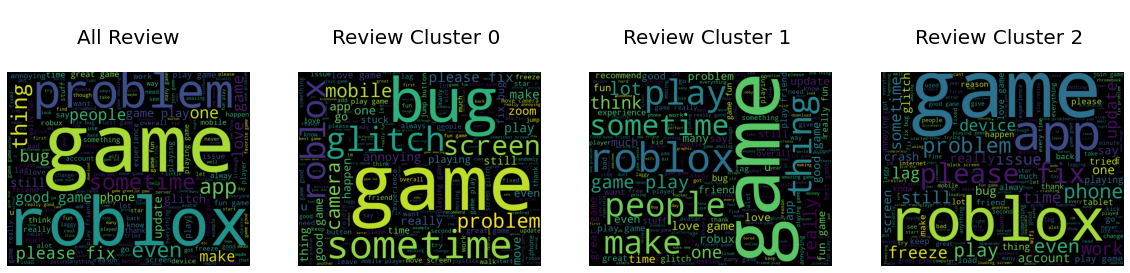

In [ ]:
fig, ax = plt.subplots(1, 4, figsize  = (20,20))
firstcloud_all = WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(df['text_string']))

firstcloud_positive=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(df[df['cluster']==0]['text_string']))
firstcloud_negative=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(df[df['cluster']==1]['text_string']))
firstcloud_1=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(df[df['cluster']==2]['text_string']))

ax[0].imshow(firstcloud_all )
ax[0].set_title('\nAll Review\n', fontsize=20)
ax[0].axis('off')
print('\n')
ax[1].imshow(firstcloud_positive)
ax[1].set_title('\nReview Cluster 0 \n',fontsize=20)
ax[1].axis('off')
print('\n')
ax[2].imshow(firstcloud_negative)
ax[2].set_title('\nReview Cluster 1 \n',fontsize=20)
ax[2].axis('off')
print('\n')
ax[3].imshow(firstcloud_1)
ax[3].set_title('\nReview Cluster 2 \n',fontsize=20)
ax[3].axis('off')


Membuat cluster Map dan Pelabelan masing-masing cluster

In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "kelompok1", 1: "kelompok2", 2: "kelompok3"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

**Plotting Scatter Plot pada cluster**

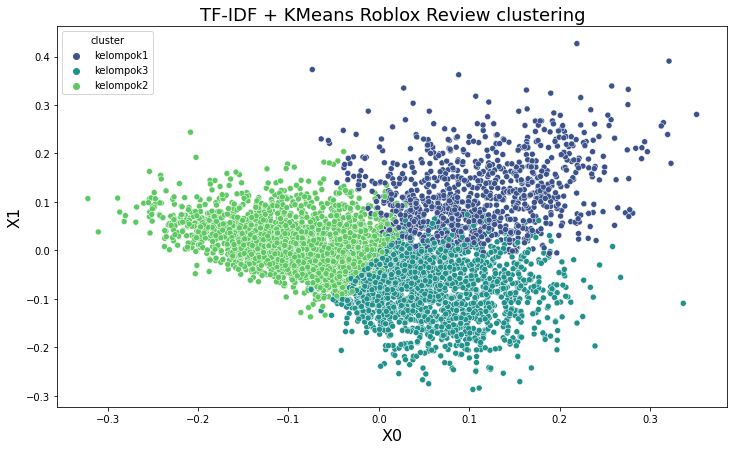

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans Roblox Review clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

Menghitung Jumlah anggota pada masing-masing cluster

In [ ]:
df['cluster'].value_counts()

kelompok2    2298
kelompok3    1736
kelompok1     966
Name: cluster, dtype: int64

Transformasi nama cluster menjadi nama kolom

**downsampling**

In [ ]:
satu = df[df["cluster"] == 'kelompok1']
dua  = df[df["cluster"] == 'kelompok2']
tiga  = df[df["cluster"] == 'kelompok3']
print(satu.shape)
print(dua.shape)
print(tiga.shape)

(966, 7)
(2298, 7)
(1736, 7)


In [ ]:
category = pd.get_dummies(df.cluster)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='cluster')
df_baru

,content,cleaned,text_lemmatized,text_string,x0,x1,kelompok1,kelompok2,kelompok3
0,"I like all the games. But some don't show up, even if you search for them. And it drains my battery faster than any other app I've downloaded. Chat filter needs to be toggleable, or customizeable. It sometimes forces me to leave a server because of a number of bugs that can occur which make it unplayable, such as shoving the screen halfway up the screen so I can't see anything.",like games show even search drains battery faster app downloaded chat filter needs toggleable customizeable sometimes forces leave server number bugs occur make unplayable shoving screen halfway screen see anything,"[like, game, show, even, search, drain, battery, faster, app, downloaded, chat, filter, need, toggleable, customizeable, sometimes, force, leave, server, number, bug, occur, make, unplayable, shoving, screen, halfway, screen, see, anything]",like game show even search drain battery faster app downloaded chat filter need toggleable customizeable sometimes force leave server number bug occur make unplayable shoving screen halfway screen see anything,0.073878,0.026805,1,0,0
1,"I have put 5 stars because I love the wide variety of games from horror to just plain fun! I was thinking about putting 4 only because for the past few months, every game I go into, I can play on it for just a few minutes until my chromebook-keep that in mind-or the Roblox app itself glitches. It glitches in a way that my game freezes and I'm unable to move. When I try to move, there is a blue box around one of the icons on screen. I don't know how to fix it, but I love the game overall!",put stars love wide variety games horror plain fun thinking putting past months every game go play minutes chromebook keep mind roblox app glitches glitches way game freezes unable move try move blue box around one icons screen know fix love game overall,"[put, star, love, wide, variety, game, horror, plain, fun, thinking, putting, past, month, every, game, go, play, minute, chromebook, keep, mind, roblox, app, glitch, glitch, way, game, freeze, unable, move, try, move, blue, box, around, one, icon, screen, know, fix, love, game, overall]",put star love wide variety game horror plain fun thinking putting past month every game go play minute chromebook keep mind roblox app glitch glitch way game freeze unable move try move blue box around one icon screen know fix love game overall,0.124401,0.066716,1,0,0
2,"This game is so fun!! I love all the kind people on it and creative avatars people make! I do want to talk about some bugs and problems though. Sometimes the screen does this thing where you can't move it, and you have to leave and rejoin to make it stop. And then the screen also does this weird bug where whenever you walk it makes the screen move too. And sometimes it zooms in and out when you try to move it. There are online daters but I don't see many of them. Overall, it's a great game. :)",game fun love kind people creative avatars people make want talk bugs problems though sometimes screen thing move leave rejoin make stop screen also weird bug whenever walk makes screen move sometimes zooms try move online daters see many overall great game,"[game, fun, love, kind, people, creative, avatar, people, make, want, talk, bug, problem, though, sometimes, screen, thing, move, leave, rejoin, make, stop, screen, also, weird, bug, whenever, walk, make, screen, move, sometimes, zoom, try, move, online, daters, see, many, overall, great, game]",game fun love kind people creative avatar people make want talk bug problem though sometimes screen thing move leave rejoin make stop screen also weird bug whenever walk make screen move sometimes zoom try move online daters see many overall great game,0.088434,0.362405,1,0,0
3,"So fun, lots of games to choose from. Also I love that you can customize your avatar, create items, and find friends! The only thing i don't like about this game is that me and my other fello

**Menyiapkan Data Latih Dan Label untuk Deep Learning Classification**

In [ ]:
review = df_baru['text_string'].values
label = df_baru[['kelompok1', 'kelompok2', 'kelompok3']].values

Memecah data, dengan komposisi data test sejumlah 20%

In [ ]:
from sklearn.model_selection import train_test_split
review_latih, review_test, label_latih, label_test = train_test_split(review, label, test_size=0.2)

**Membuat Tokenizer, Sequences dan Padding pada Data Train & Data Test**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(review_latih) 
tokenizer.fit_on_texts(review_test)
 
sekuens_latih = tokenizer.texts_to_sequences(review_latih)
sekuens_test = tokenizer.texts_to_sequences(review_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

Menambahkan Hidden Layer:

-Word Embedding

-LSTM

-Activation ReLu

-Activation Softmax

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 117,507
Trainable params: 117,507
Non-trainable params: 0
_________________________________________________________________


Proses belajar data

In [ ]:
num_epochs = 15
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/15
125/125 - 8s - loss: 0.7340 - accuracy: 0.6540 - val_loss: 0.2251 - val_accuracy: 0.9170 - 8s/epoch - 60ms/step
Epoch 2/15
125/125 - 1s - loss: 0.1419 - accuracy: 0.9480 - val_loss: 0.1552 - val_accuracy: 0.9350 - 716ms/epoch - 6ms/step
Epoch 3/15
125/125 - 1s - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.2083 - val_accuracy: 0.9220 - 758ms/epoch - 6ms/step
Epoch 4/15
125/125 - 1s - loss: 0.0600 - accuracy: 0.9797 - val_loss: 0.2304 - val_accuracy: 0.9250 - 768ms/epoch - 6ms/step
Epoch 5/15
125/125 - 1s - loss: 0.0135 - accuracy: 0.9967 - val_loss: 0.2510 - val_accuracy: 0.9290 - 766ms/epoch - 6ms/step
Epoch 6/15
125/125 - 1s - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.2521 - val_accuracy: 0.9330 - 745ms/epoch - 6ms/step
Epoch 7/15
125/125 - 1s - loss: 7.7486e-04 - accuracy: 1.0000 - val_loss: 0.2582 - val_accuracy: 0.9380 - 728ms/epoch - 6ms/step
Epoch 8/15
125/125 - 1s - loss: 3.8912e-04 - accuracy: 1.0000 - val_loss: 0.2693 - val_accuracy: 0.9360 - 774ms/epoch - 6ms

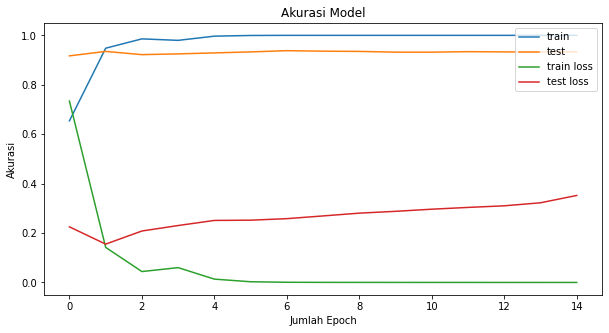

In [ ]:
# plot of accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Jumlah Epoch')
plt.legend(['train', 'test', 'train loss', 'test loss'], loc='upper right')
plt.show()

In [ ]:
label_test

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [ ]:
label_latih

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)